In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Bug Fix Benchmark Analysis

In [3]:
# Replace with the location of your result files.
DECOMPOSITION_PERFORMANCE_PATH='data/decomposition_scores.csv'
METRICS_PATH='data/metrics.csv'

In [ ]:
# Create merged dataset


## Performance

In [4]:
df_performance = pd.read_csv(DECOMPOSITION_PERFORMANCE_PATH, names=['project', 'bug_id', 'smartcommit_rand_index','flexeme_rand_index','file_rand_index'])
df_performance.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index
0,Cli,10,1.000000,0.000000,1.000000
1,Cli,11,1.000000,1.000000,1.000000
2,Cli,12,0.481884,0.655797,0.655797
3,Cli,13,1.000000,0.685714,0.780952
4,Cli,14,0.466667,0.466667,0.466667


In [10]:
df_performance.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index
count,809.000000,809.000000,809.000000,809.000000
mean,47.196539,0.766459,0.613718,0.766883
std,41.077802,0.243963,0.285530,0.246384
min,1.000000,0.000000,0.000000,0.000000
25%,15.000000,0.523810,0.451128,0.522048
50%,34.000000,0.852308,0.558824,0.849012
75%,71.000000,1.000000,0.913043,1.000000
max,176.000000,1.000000,1.000000,1.000000


In [11]:
df_performance.groupby(['project']).agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median', 'file_rand_index':'median'})

,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index
project,,,,
Cli,39,1.000000,0.714286,0.913043
Closure,174,0.717130,0.555784,0.761696
Codec,18,1.000000,0.491463,1.000000
Collections,4,1.000000,1.000000,1.000000
Compress,47,1.000000,0.500000,1.000000
Csv,16,1.000000,0.609890,1.000000
Gson,18,0.840909,0.490942,0.692039
JacksonCore,26,0.873950,0.533575,1.000000
JacksonDatabind,112,0.748401,0.603333,0.708660


In [12]:
df_performance.agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median', 'file_rand_index':'median'})

bug_id                    809.000000
smartcommit_rand_index      0.852308
flexeme_rand_index          0.558824
file_rand_index             0.849012
dtype: float64

In [13]:
df_perf_melted = pd.melt(df_performance, id_vars=['project', 'bug_id'])
df_perf_melted.head()

,project,bug_id,variable,value
0,Cli,10,smartcommit_rand_index,1.000000
1,Cli,11,smartcommit_rand_index,1.000000
2,Cli,12,smartcommit_rand_index,0.481884
3,Cli,13,smartcommit_rand_index,1.000000
4,Cli,14,smartcommit_rand_index,0.466667


### Performance not counting the bugs that are not decomposed by any tool

In [73]:
# Read file tool_decompositions_summary.csv
df_decompositions_summary = pd.read_csv('decomposition_summary.csv')
df_decompositions_summary

,project,bug_id,flexeme_exists,smartcommit_exists
0,Math,26,True,True
1,Cli,38,True,True
2,JacksonDatabind,53,True,True
3,Math,3,True,True
4,Time,16,True,True
...,...,...,...,...
833,Collections,27,False,True
834,JacksonDatabind,70,True,True
835,Closure,16,True,True
836,Closure,66,True,True


In [76]:
df_decompositions_merge = df_performance.merge(df_decompositions_summary, how='left', on=['project', 'bug_id']).dropna()
df_decompositions_merge

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index.csv,flexeme_exists,smartcommit_exists
0,Cli,10,0.780000,0.348790,1.000000,True,True
1,Cli,11,1.000000,1.000000,1.000000,True,True
2,Cli,12,0.576879,0.432089,0.576879,True,True
3,Cli,13,0.486631,0.500891,0.500891,True,True
4,Cli,14,0.857838,0.836417,0.836417,False,True
...,...,...,...,...,...,...,...
801,Time,5,0.834464,0.373714,0.763908,True,True
802,Time,6,0.966673,0.353403,0.863835,True,True
803,Time,7,0.884071,0.409823,0.783198,True,True
804,Time,8,0.827381,0.496528,0.496528,False,True


In [79]:
print("Median")
print(f"SmartCommit before: {df_decompositions_merge['smartcommit_rand_index'].median(skipna=True)}")
print(f"Flexeme before: {df_decompositions_merge['flexeme_rand_index'].median(skipna=True)}")

print("Mean")
print(f"SmartCommit before: {df_decompositions_merge['smartcommit_rand_index'].mean(skipna=True)}")
print(f"Flexeme before: {df_decompositions_merge['flexeme_rand_index'].mean(skipna=True)}")

Median
SmartCommit before: 0.7117421415760051
Flexeme before: 0.5013191478230323
Mean
SmartCommit before: 0.717828514909326
Flexeme before: 0.545648327551944


In [80]:
df_decompositions_copy = df_decompositions_merge.copy()

# Update smartcommit_rand_index column to -1 if smartcommit_exists is False
df_decompositions_copy.loc[df_decompositions_copy['smartcommit_exists'] == False, 'smartcommit_rand_index'] = np.NaN

# Update flexeme_rand_index column to NaN if flexeme_exists is False
df_decompositions_copy.loc[df_decompositions_copy['flexeme_exists'] == False, 'flexeme_rand_index'] = np.NaN

df_decompositions_copy

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index.csv,flexeme_exists,smartcommit_exists
0,Cli,10,0.780000,0.348790,1.000000,True,True
1,Cli,11,1.000000,1.000000,1.000000,True,True
2,Cli,12,0.576879,0.432089,0.576879,True,True
3,Cli,13,0.486631,0.500891,0.500891,True,True
4,Cli,14,0.857838,NaN,0.836417,False,True
...,...,...,...,...,...,...,...
801,Time,5,0.834464,0.373714,0.763908,True,True
802,Time,6,0.966673,0.353403,0.863835,True,True
803,Time,7,0.884071,0.409823,0.783198,True,True
804,Time,8,0.827381,NaN,0.496528,False,True


In [81]:
print("Median")
print(f"SmartCommit after: {df_decompositions_copy['smartcommit_rand_index'].median(skipna=True)}")
print(f"Flexeme after: {df_decompositions_copy['flexeme_rand_index'].median(skipna=True)}")

print("Mean")
print(f"SmartCommit after: {df_decompositions_copy['smartcommit_rand_index'].mean(skipna=True)}")
print(f"Flexeme after: {df_decompositions_copy['flexeme_rand_index'].mean(skipna=True)}")

Median
SmartCommit after: 0.7211999553919929
Flexeme after: 0.4925010115541968
Mean
SmartCommit after: 0.7222376287798054
Flexeme after: 0.5186629151937683


### Statistical Significance and Effect Size

In [8]:
# Please use the RQ1.R instead of the code below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

# model = smf.mixedlm(formula='value ~ variable', data=df_perf_melted, groups=df_perf_melted['project'])
# result = model.fit()
# result.summary()

## Metrics

In [6]:
df_metrics = pd.read_csv(METRICS_PATH, names=["project","bug_id","files_updated","test_files_updated","hunks","average_hunk_size","code_changed_lines","noncode_changed_lines","tangled_lines","tangled_hunks"])
df_metrics.head()

,project,bug_id,files_updated,test_files_updated,hunks,average_hunk_size,code_changed_lines,noncode_changed_lines,tangled_lines,tangled_hunks
0,Cli,10,1,1,1,2.000000,2,23,0.0,0
1,Cli,11,1,1,1,2.000000,2,16,0.0,0
2,Cli,12,1,1,7,3.428571,24,58,2.0,2
3,Cli,13,4,1,6,2.500000,15,19,0.0,0
4,Cli,14,1,1,3,3.333333,10,69,1.0,1


# Correlation between perfromance and metrics

In [7]:
df = pd.merge(df_performance, df_metrics,  how='left', on=['project','bug_id'])
df.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,code_changed_lines,noncode_changed_lines,tangled_lines,tangled_hunks
0,Cli,10,1.000000,0.000000,1.000000,1,1,1,2.000000,2,23,0.0,0
1,Cli,11,1.000000,1.000000,1.000000,1,1,1,2.000000,2,16,0.0,0
2,Cli,12,0.481884,0.655797,0.655797,1,1,7,3.428571,24,58,2.0,2
3,Cli,13,1.000000,0.685714,0.780952,4,1,6,2.500000,15,19,0.0,0
4,Cli,14,0.466667,0.466667,0.466667,1,1,3,3.333333,10,69,1.0,1


In [16]:
df.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index,file_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,code_changed_lines,noncode_changed_lines,tangled_lines,tangled_hunks
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,807.000000,809.000000,809.000000,809.000000,809.000000
mean,47.196539,0.766459,0.613718,0.766883,1.641533,1.176761,4.949320,4.157339,19.909765,56.299135,2.199011,0.702101
std,41.077802,0.243963,0.285530,0.246384,1.701064,1.327416,8.587848,3.639714,35.441145,113.257339,3.939669,1.331830
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,15.000000,0.523810,0.451128,0.522048,1.000000,1.000000,1.000000,2.000000,4.000000,16.000000,0.000000,0.000000
50%,34.000000,0.852308,0.558824,0.849012,1.000000,1.000000,2.000000,3.000000,9.000000,32.000000,0.000000,0.000000
75%,71.000000,1.000000,0.913043,1.000000,2.000000,1.000000,5.000000,5.000000,22.000000,62.000000,2.000000,1.000000
max,176.000000,1.000000,1.000000,1.000000,28.000000,28.000000,130.000000,54.000000,486.000000,2063.000000,20.000000,13.000000


In [17]:
df.to_csv("merge.csv")

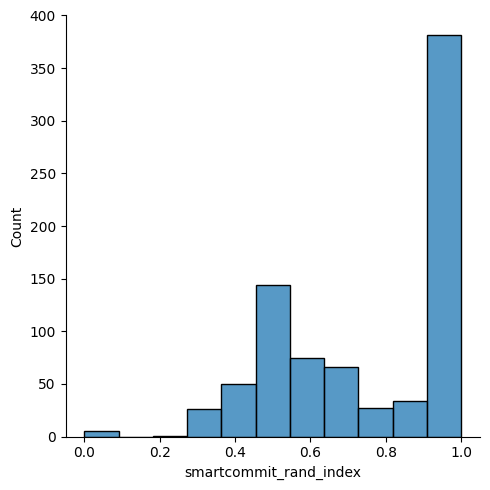

In [18]:
sns.displot(df, x="smartcommit_rand_index")

[Text(0.5, 1.0, 'Performance vs Lines')]

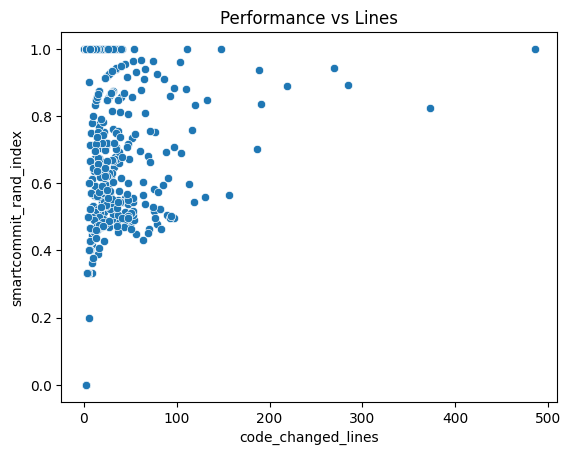

In [20]:
sns.scatterplot(df, x="code_changed_lines", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Lines')]

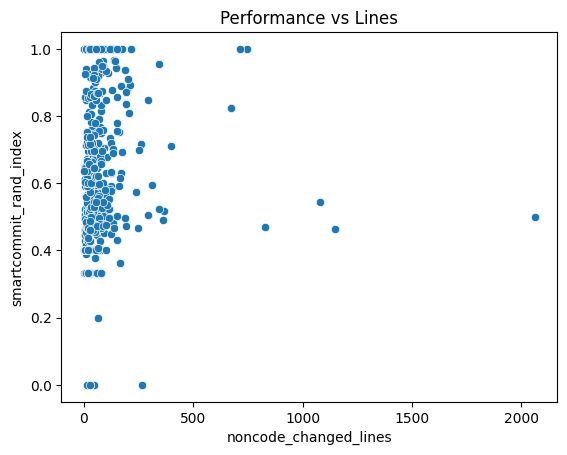

In [21]:
sns.scatterplot(df, x="noncode_changed_lines", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Files')]

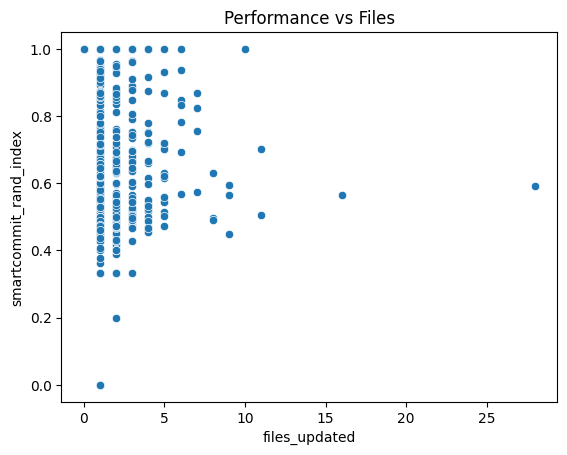

In [22]:
sns.scatterplot(df, x="files_updated", y="smartcommit_rand_index").set(title="Performance vs Files")

[Text(0.5, 1.0, 'Performance vs Tangled Lines')]

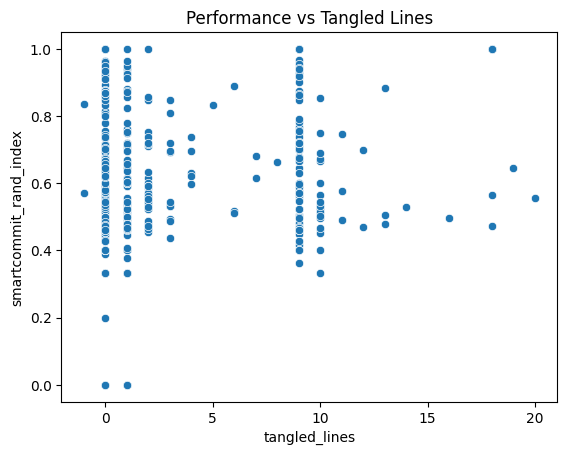

In [29]:
sns.scatterplot(df, x="tangled_lines", y="smartcommit_rand_index").set(title="Performance vs Tangled Lines")

[Text(0.5, 1.0, 'Performance vs Tangled Hunks')]

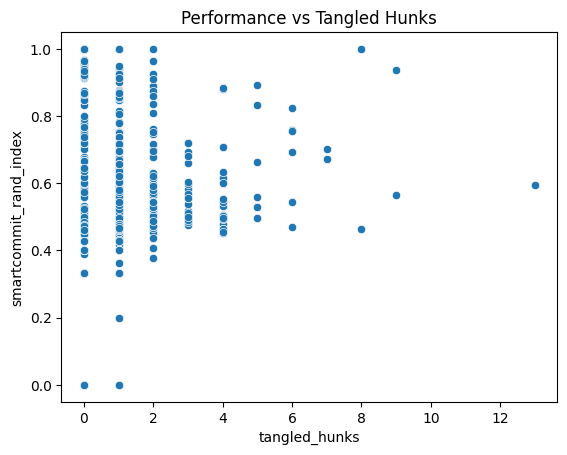

In [8]:
sns.scatterplot(df, x="tangled_hunks", y="smartcommit_rand_index").set(title="Performance vs Tangled Hunks")

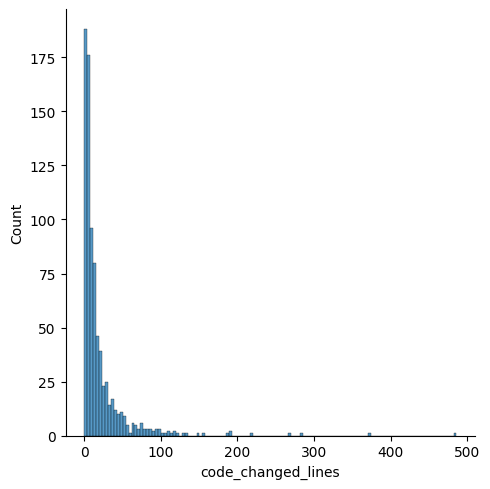

In [23]:
sns.displot(df, x="code_changed_lines")

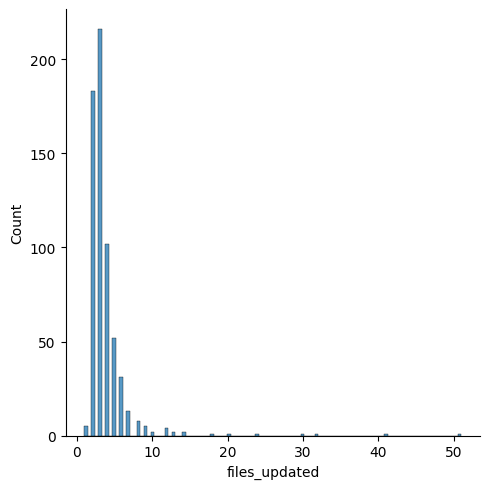

In [16]:
sns.displot(df, x="files_updated")

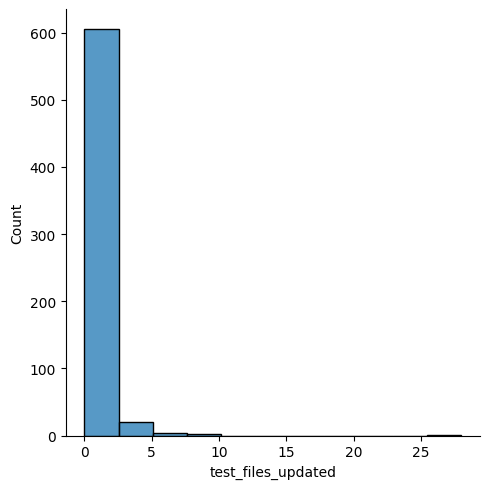

In [17]:
sns.displot(df, x="test_files_updated")

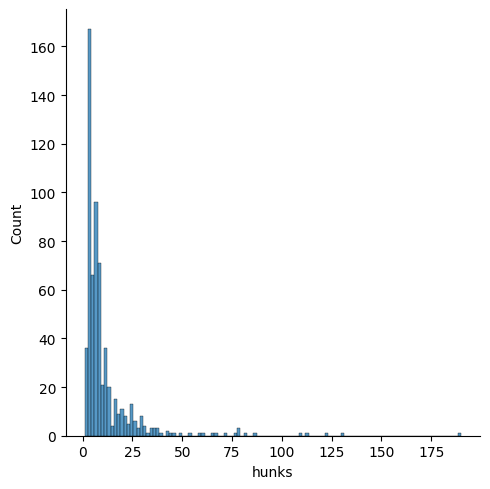

In [18]:
sns.displot(df, x="hunks")

<Axes: >

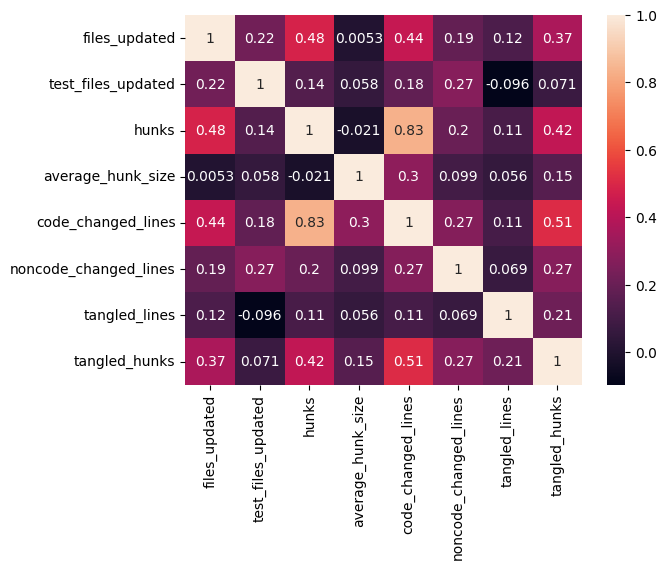

In [31]:
features = list(['files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'code_changed_lines', "noncode_changed_lines","tangled_lines","tangled_hunks"])
correlation_matrix = df[features].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

In [45]:
df_time = pd.read_csv("../out/time.csv", names=['project', 'bug_id', 'tool', 'time'])
df_time.head()

FileNotFoundError: [Errno 2] No such file or directory: '../out/time.csv'

In [ ]:
df_time.groupby('tool').mean()

In [ ]:
df.describe()

In [ ]:
df.groupby('project')['project'].count()

## Statistical Significance and Effect Size

In [12]:
df.to_csv('merge.csv', index=False)
# Please use the RQ2.R instead of the code cell below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

In [ ]:
# formula = 'smartcommit_rand_index ~ files_updated+test_files_updated+hunks+average_hunk_size+lines_updated'
# model = smf.mixedlm(formula = formula, data=df, groups=df['project'])
# result = model.fit()
# # pd.options.display.max_rows = 4000
#
# result.summary()

### Tisane test (WIP)

In [ ]:
import tisane as ts
import pandas as pd

## Load data
df = pd.read_csv("./exercise_simple.csv")

## Declare observed variables
# The researchers observe participants/cases (observational unit).
pid = ts.Unit("case", cardinality=245) # pid is an observational unit. There are 245 adults.

# Each pid (cause/adult) has an age measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable age.
# Note: By default, number_of_instances equals 1. The parameter value is explicitly set below for clarity.
age = pid.numeric("age", number_of_instances=1)  # participant age

# Each pid has an exercise measure, which is numeric .
# Verbose: Each instance of pid has one instance of a numeric variable exercise.
exercise = pid.numeric("exercise")  # years of vigorous physical exercise

# Each pid has an endurance measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable endurance.
endurance = pid.numeric("endurance") # number of minutes of sustained jogging on a treadmill

## Declare conceptual relationships between the observed variables
exercise.causes(endurance)
age.associates_with(endurance)

## Query relatioships to infer a statistical model and generate a script
# Author query by partially authoring a statistical model as a Design
design = ts.Design(dv=endurance, ivs=[age, exercise]).assign_data(df)
ts.infer_statistical_model_from_design(design=design)